In [1]:
import math as mt
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [37]:
class LogisticRegression:

    def sigmoid(self, x, w, b):
        return 1 / (1 + 2.7128 ** (-(np.dot(w, x) + b)))

    def step_gradient(self, x, y, learning_rate, w, b):
        for i in range(len(x)):
            p = sigmoid(x[i], w, b)
            for j in range(len(w)):
                delta_w = learning_rate*(p-y[i])*x[i][j]
                w[j] -= delta_w
            b -= learning_rate*(p-y[i])
        return w, b

    def cost(self, x, y, w, b):
        total_cost = 0
        for i in range(len(x)):
            p = sigmoid(x[i], w, b)
            total_cost += -y[i] * mt.log(p) - (1-y[i])*mt.log(1-p)
        return total_cost

    def fit(self, x_train, y_train, learning_rate=0.1, maxItr=200):
        w = [0 for i in range(x_train.shape[1])]
        b = 0
        print('START: ', self.cost(x_train, y_train, w, b))
        for i in range(maxItr):
            w, b = self.step_gradient(x_train, y_train, learning_rate, w, b)
        print('FINAL: ', self.cost(x_train, y_train, w, b))
        return w, b

    def predict(self, X, w, b):
        predictions = []
        for x in X:
            if np.dot(w, x) + b > 0:
                predictions.append(1)
            else:
                predictions.append(0)
        return np.array(predictions)
    
    def accuracy(self, x_test, y_test, w, b):
        y_pred = self.predict(x_test, w, b)
        count = (y_pred == y_test).sum()
        return count / len(y_test)

### Generating Data

In [98]:
x, y = make_classification(n_samples=300, n_features=2, n_redundant=0)

### Training the classifier

In [99]:
clf = LogisticRegression()
w, b = clf.fit(x, y)

START:  207.944154168
FINAL:  41.88010951


### Accuracy

In [108]:
print(clf.accuracy(x, y, w, b))

0.97


### Plotting the decision boundary

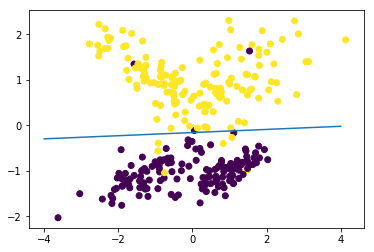

In [107]:
x1 = np.linspace(-4, 4, 20)
x2 = [-(b + w[0]*x1[i]) / w[1] for i in range(20)]
plt.plot(x1, x2)
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()